<a href="https://colab.research.google.com/github/jiiwon129/EWHA/blob/main/HW4_DL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1. Short Question**

**(a) CNN 모델은 크게 3가지 종류의 층으로 구성된다. 3가지 층에 대하여 그 이름과 각 층의 역할에 대해 서술하시오.**

1. 합성곱 계층(Convolution Layer)
- 일정한 사이즈로 입력 데이터를 지역적으로 구분 후, 다수의 필터과 곱연산을 통해 특성 맵을 추출한다.

2. 풀링 계층(Pooling Layer)
- 추출된 특성 맵을 지정한 풀링 사이즈로 구분하여 각 구역당 최댓값(Max Pooling) 또는 평균값(Average Pooling) 하나만을 남기는 방식으로 특성 맵의 크기를 축소한다.

3. 완전 연결 계층(Fully Connected Layer)
- 합성곱 및 풀링 계층에서 출력된 특성 맵을 일렬로 변형 후, 완전 연결 층에서 출력 클래스들과의 완전 연결 연산을 통한 예측 및 분류가 이루어진다.

**(b) 합성곱 층(convolutional layer)의 2가지 핵심 파라미터에 대해 서술하시오.**

1. 커널 크기(kernel size)
- 입력으로부터 필터를 적용할 패치의 크기
- 크게 설정하면 한 번에 넓은 구역에서 클래스를 구별하는 특징을 찾도록 하는 것이고, 작게 설정한다면 좀 더 작은 구역에서의 특징을 찾아내도록 하는 것이다.
  - 따라서 모형에서 기대하는 바에 따라 필터에 적용할 패치의 크기(patch size) 하이퍼 파라미터를 다르게 설정할 수 있다.

2. 합성곱 연산에 사용할 필터의 개수(number of filters)
- 특성 맵의 출력 깊이
- 필터의 개수가 많을수록 다양한 특징을 추출할 수 있어 모델의 표현력이 높아질 수 있지만, 계산량과 메모리 사용량도 함께 증가하게 된다.

**(c) 딥러닝 모델에서 이미지를 분석하기 위해서는 이미지 데이터를 컴퓨터가 이해할 수 있는
형태로 변환하는 과정이 필요하다. 이 과정에 대해 서술하시오.**

이미지의 최소 단위인 픽셀 값으로 변환한다.
- 컴퓨터는 이미지를 숫자 정보로만 처리 가능하기 때문에 이미지는 행렬 형태의 픽셀 값으로 변환된다.
- 흑백 이미지
  - 2차원 행렬
  - 각 픽셀의 값을 [0, 255] 사이의 숫자로 변환 후 matrix 변환 (0 = black, 1 = white)
- 컬러 이미지
  - RGB 채널을 포함한 3차원 행렬
  - 각 픽셀의 값을 Red, Green, Blue 컬러를 이용하여 3가지 숫자로 나타낸다.


**(d) 이미지가 filter를 지나가면서 input size와 output size가 달라지거나 그대로 유지된다. 이미지의 input size와 output size가 같아지도록 만드는 convolution layer의 hyper-parameter에 대
해 서술하시오.**

Convolution layer
- 하나의 layer 안에서 각 filter들의 weight을 이용하여 convolution operation을 진행하고 bias를 더한 다음 non-linear activation function(ReLU 등)을 거치며 결과값을 출력한다.

1개의 이미지를 학습하는 데에 filter를 여러 개 이용하는 경우, 여러 파라미터를 지정해야한다.

1. 필터의 개수(filters)
2. 필터의 사이즈(kernel_size, filter_size)
3. 필터의 보폭(stride)

filter가 이미지를 지나가면서 stride에 따라 output size가 작아진다(Diemension Reduction). 여기서 **padding**은 이미지의 가장자리에 0을 추가한다. 이 단계를 통해 이미지가 down scale되는 것을 막을 수 있고, input size와 output size가 동일하게 유지된다.
padding을 하지 않을 경우, convolution layer를 거칠수록 feature map의 크기는 줄어든다.

**Padding**
- 이미지 가장자리에 0을 추가하여 convolution 연산 후에도 출력 크기가 줄어들지 않도록 하는 파라미터
- input size와 output size를 동일하게 유지하기 위해 사용

### **Problem 2. MNIST**

MNIST dataset은 총 70,000개의 28x28 저해상도 흑백 이미지를 포함하고 있다. 따라서 하나의 이미지는 (28,
 28,1) 배열의 형태로 정의할 수 있다. 전체 데이터 셋에서 이미지가 속한 클래스는 총 10개로 0부터 9까지의
숫자에 대한 손글씨 이미지이다. 70,000개 중 60,000개는 train과 validation set에, 10,000개는 test set에 포함
된다.

In [ ]:
import sys
import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model

import numpy as np
import matplotlib.pyplot as plt

**(a) Keras에 내장된 mnist dataset을 불러들인 후 train data와 test data로 분리하시오.**


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**(b) 이미지를 model에 넣기 위해 각 pixel의 값을 숫자로 변형시키는 전처리 과정을 수행하고,
data normalization을 하시오.**

In [ ]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
# reshaping mnist dataset
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [ ]:
# Scale images to the [0, 1] range
X_train /= 255.
X_test /= 255.

**(c) 필요한 변수에 대하여 one-hot encoding을 하시오.**

y에 해당하는 label 값은 0부터 9까지 10개의 숫자

In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사
용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위
에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
이때, 모든 모델은 pooling layer를 반드시 포함하며, 적어도 하나의 모델은 drop out을 하이
퍼 파라미터로 설정하시오. (모델에 대한 코드를 반드시 첨부할 것.)**

Model 1
- Dropout 포함
- Activation Function: ReLU
- Stride = 1
- kernel size = 5 x 5, 2 x 2
- batch size = 128
- epoch = 10

In [ ]:
model1 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,098 (98.04 KB)

 Trainable params: 25,098 (98.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist1 = model1.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.7658 - loss: 0.7662 - val_accuracy: 0.9747 - val_loss: 0.0873
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 120ms/step - accuracy: 0.9647 - loss: 0.1184 - val_accuracy: 0.9821 - val_loss: 0.0586
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.9741 - loss: 0.0844 - val_accuracy: 0.9850 - val_loss: 0.0470
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9782 - loss: 0.0733 - val_accuracy: 0.9866 - val_loss: 0.0419
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.9800 - loss: 0.0643 - val_accuracy: 0.9883 - val_loss: 0.0367
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 96ms/step - accuracy: 0.9829 - loss: 0.0585 - val_accuracy: 0.9896 - val_loss: 0.0311
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 81ms/step - accuracy: 0.9838 - loss: 0.0533 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9844 - loss: 0.0475 -

In [ ]:
score1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', np.round(score1[0],4))
print('Test accuracy:', np.round(score1[1],4))

Test loss: 0.0296
Test accuracy: 0.9897


Model 2
- Activation Function: tanh
- kernel size = 5 x 5, 3 x 3
- stride = 2
- 뉴런의 수 상대적으로 적음
- batch size = 128
- epoch = 20

In [ ]:
model2 = keras.Sequential([
    layers.Conv2D(16, kernel_size=(5, 5), strides=2, activation='tanh', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='tanh'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,514 (37.16 KB)

 Trainable params: 9,514 (37.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist2 = model2.fit(X_train, y_train, batch_size=128, epochs=20,
                  validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7078 - loss: 1.0617 - val_accuracy: 0.9635 - val_loss: 0.1344
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9663 - loss: 0.1240 - val_accuracy: 0.9787 - val_loss: 0.0807
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9761 - loss: 0.0814 - val_accuracy: 0.9829 - val_loss: 0.0621
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9816 - loss: 0.0642 - val_accuracy: 0.9853 - val_loss: 0.0514
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9854 - loss: 0.0498 - val_accuracy: 0.9865 - val_loss: 0.0459
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9869 - loss: 0.0442 - val_accuracy: 0.9859 - val_loss: 0.0471
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9894 - loss: 0.0370 - val_accuracy: 0.9871 - val_loss: 0.0409
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9910 - loss: 0.0325 - val

In [ ]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', np.round(score2[0],4))
print('Test accuracy:', np.round(score2[1],4))

Test loss: 0.042
Test accuracy: 0.9889


Model 3
(Model 1에서 he uniform 초기화 추가한 모델)
- Drop out 포함
- Activation Function: ReLU
- he_uniform 초기화
- kernel size: 5 x 5, 2 x 2
- stride = 1
- batch size = 128
- epoch = 10

In [ ]:
model3 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=1, activation='relu', kernel_initializer='he_uniform', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', kernel_initializer='he_uniform'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])

model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,306 (841.04 KB)

 Trainable params: 215,306 (841.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist3 = model3.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 127ms/step - accuracy: 0.8247 - loss: 0.5618 - val_accuracy: 0.9827 - val_loss: 0.0558
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9741 - loss: 0.0856 - val_accuracy: 0.9868 - val_loss: 0.0388
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9801 - loss: 0.0612 - val_accuracy: 0.9877 - val_loss: 0.0364
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 104ms/step - accuracy: 0.9842 - loss: 0.0479 - val_accuracy: 0.9889 - val_loss: 0.0325
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 112ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9914 - val_loss: 0.0262
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 84ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9907 - val_loss: 0.0263
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9909 - val_loss: 0.0261
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9909 - loss: 0.0287

In [ ]:
score3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', np.round(score3[0],4))
print('Test accuracy:', np.round(score3[1],4))

Test loss: 0.0227
Test accuracy: 0.9925


Model 4
- Drop out 없음
- he normal 초기화
- padding = same
- Activation Function: ReLU
- 뉴런 수 상대적으로 작음
- kernel size: 3 x 3
- stride = 1
- batch size = 64
- epoch = 10

In [ ]:
model4 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

model4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist4 = model4.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9884 - val_loss: 0.0463
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 86ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9923 - val_loss: 0.0317
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9915 - val_loss: 0.0364
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.9983 - loss: 0.0045 - val_accuracy: 0.9908 - val_loss: 0.0430
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9904 - val_loss: 0.0462
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.9985 - loss: 0.0041 - val_accuracy: 0.9906 - val_loss: 0.0408
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9900 - val_loss: 0.0406
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9992 - loss: 0.0025 - 

In [ ]:
score4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', np.round(score4[0],4))
print('Test accuracy:', np.round(score4[1],4))

Test loss: 0.0515
Test accuracy: 0.9903


Model 5
- Drop out 포함
- Activation Function: ReLU
- Batch Normalization 적용
- Padding = same
- kernel size = 3 x 3
- batch size = 32
- epoch = 15

In [ ]:
model5 = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(10, activation='softmax')
])

model5.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist5 = model5.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 56ms/step - accuracy: 0.9344 - loss: 0.2248 - val_accuracy: 0.9808 - val_loss: 0.0611
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 56ms/step - accuracy: 0.9820 - loss: 0.0569 - val_accuracy: 0.9868 - val_loss: 0.0445
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9846 - val_loss: 0.0446
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.9878 - loss: 0.0371 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9909 - loss: 0.0308 - val_accuracy: 0.9896 - val_loss: 0.0361
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 55ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9909 - val_loss: 0.0300
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 56ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9925 - val_loss: 0.0265
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 

In [ ]:
score5 = model5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', np.round(score5[0],4))
print('Test accuracy:', np.round(score5[1],4))

Test loss: 0.0288
Test accuracy: 0.9926


**(e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은가?**

Model 1

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1_class = np.argmax(y_pred1,axis=1)
y_test1_class = np.argmax(y_test,axis=1)

conmat1 = confusion_matrix(y_test1_class,y_pred1_class)
print(conmat1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[ 976    0    0    0    1    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    2 1018    0    2    0    1    5    2    0]
 [   1    0    2  998    0    3    0    4    2    0]
 [   0    1    0    0  979    0    0    0    0    2]
 [   1    1    0    4    0  881    1    1    1    2]
 [   2    3    0    0    4    4  943    0    2    0]
 [   0    3    6    1    0    1    0 1016    1    0]
 [   3    1    2    0    1    0    1    1  962    3]
 [   0    3    0    0    9    1    0    4    3  989]]


Model 2

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2_class = np.argmax(y_pred2,axis=1)
y_test2_class = np.argmax(y_test,axis=1)

conmat2 = confusion_matrix(y_test2_class,y_pred2_class)
print(conmat2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 972    0    2    0    1    1    2    1    1    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   1    1 1025    0    1    0    1    3    0    0]
 [   0    0    3  997    0    4    0    3    2    1]
 [   0    0    1    0  970    0    5    1    2    3]
 [   1    0    0    5    0  882    2    1    1    0]
 [   4    2    2    0    1    2  945    0    2    0]
 [   0    2    3    0    0    0    0 1020    1    2]
 [   3    0    5    1    1    1    0    3  956    4]
 [   0    2    1    3    5    4    1    3    1  989]]


Model 3

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3_class = np.argmax(y_pred3,axis=1)
y_test3_class = np.argmax(y_test,axis=1)

conmat3 = confusion_matrix(y_test3_class,y_pred3_class)
print(conmat3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   1    2 1019    3    1    0    0    6    0    0]
 [   0    0    2 1001    0    6    0    0    1    0]
 [   0    0    0    0  976    0    2    0    0    4]
 [   0    0    0    2    0  888    1    1    0    0]
 [   3    2    0    0    1    2  949    0    1    0]
 [   0    2    1    0    0    0    0 1023    0    2]
 [   2    0    1    2    0    0    1    1  964    3]
 [   0    0    0    0    3    7    0    2    2  995]]


Model 4

In [ ]:
y_pred4 = model4.predict(X_test)
y_pred4_class = np.argmax(y_pred4,axis=1)
y_test4_class = np.argmax(y_test,axis=1)

conmat4 = confusion_matrix(y_test4_class,y_pred4_class)
print(conmat4)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1129    1    0    1    0    1    2    1    0]
 [   2    1 1022    1    0    0    1    5    0    0]
 [   0    0    1  996    0   11    0    1    1    0]
 [   0    0    1    0  977    0    1    0    0    3]
 [   0    0    0    3    0  883    5    0    1    0]
 [   2    2    1    0    2    1  949    0    1    0]
 [   0    3    4    0    0    0    0 1018    1    2]
 [   4    0    2    0    2    1    0    1  962    2]
 [   1    1    1    0    8    5    0    3    2  988]]


Model 5

In [ ]:
y_pred5 = model5.predict(X_test)
y_pred5_class = np.argmax(y_pred5,axis=1)
y_test5_class = np.argmax(y_test,axis=1)

conmat5 = confusion_matrix(y_test5_class,y_pred5_class)
print(conmat5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[[ 975    0    1    0    0    1    2    1    0    0]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   1    2 1022    0    0    0    0    7    0    0]
 [   0    1    1 1001    0    5    0    1    1    0]
 [   0    0    0    0  976    0    0    0    0    6]
 [   0    0    0    4    0  887    1    0    0    0]
 [   1    2    0    0    1    2  951    0    1    0]
 [   0    2    2    0    0    0    0 1022    1    1]
 [   1    0    1    0    1    2    0    2  965    2]
 [   0    0    0    0    7    4    0    4    0  994]]


**(f) (d)에서 정의한 모델 중 하나를 선택하여 callback option을 설정하여 학습을 진행할 것이다.
epoch=100, batch_size=32으로 설정한 후, Call back option을 사용하여 model의 accuracy가 20
번 동안 좋아지지 않으면 학습을 멈추도록 설정하시오. 또한, training history를 시각화하여
plot을 첨부하시오.**

정확도가 0.9926으로 가장 높은 Model 5 선택

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist5 = model5.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9315 - loss: 0.2288 - val_accuracy: 0.9864 - val_loss: 0.0419
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9831 - loss: 0.0572 - val_accuracy: 0.9872 - val_loss: 0.0377
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9860 - val_loss: 0.0470
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.9901 - val_loss: 0.0336
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9918 - loss: 0.0238 - val_accuracy: 0.9899 - val_loss: 0.0348
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9889 - val_loss: 0.0362
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9947 - 

training history 시각화

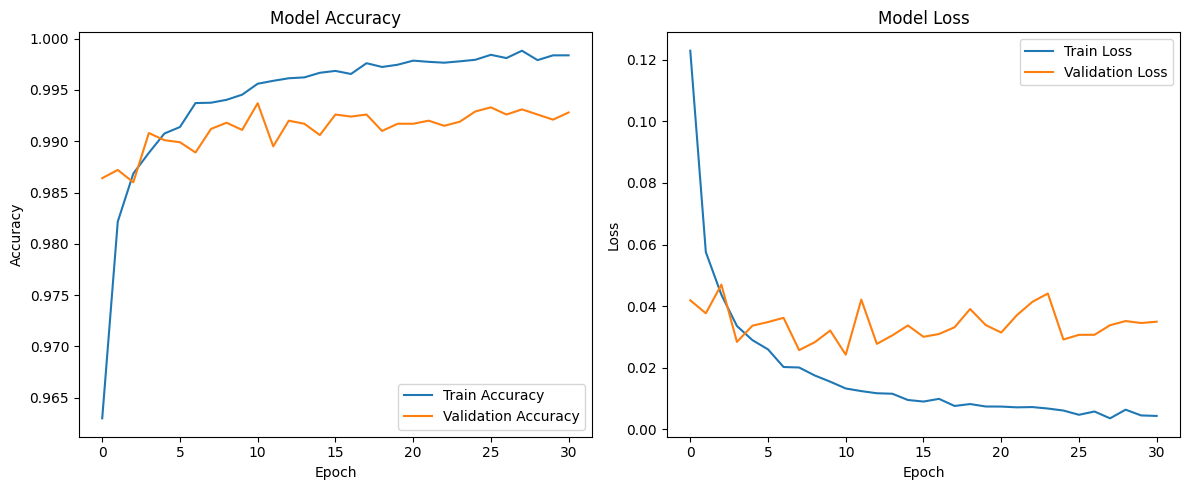

In [ ]:
plt.figure(figsize=(12, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(hist5.history['accuracy'], label='Train Accuracy')
plt.plot(hist5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(hist5.history['loss'], label='Train Loss')
plt.plot(hist5.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()